<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/Assignments/Assignment%203./assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - optimization and regularization

Hi there! In this assignment, you will use neural networks (or something else, if you want) to predict values in a regression problem.

To get you started, I have provided a complete working example.

When you are done, submit your results on the Kaggle webpage for this competition. If you do not like to show your score to everyone, you can use an anonymous username on Kaggle.

However, I suggest you use your real name, after all it is just meant as an exercise and it is more fun that way. You can submit 5 times every day, so you can experiment with some stuff without being "locked in".

# Details

The metric used to score this assignment is root mean squared error.

# Kaggle

The assignment uses Kaggle. You can use it to submit your predictions. It will then give you a score (based on **some** of the test data). The final score will be calculated using the **other** part of the test data (so you have to change of looking at the test data for the competition).

You can visit the webpage here: https://www.kaggle.com/t/d1c2e88aec184183a6ff2e933b50e669. You need to create an account (free, just need an email).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

seed = 42
tf.random.set_seed(seed)

In [ ]:
# Load data (must be in same folder as this file, which it will be if you simply unzip the assignment).
# Note that we don't have any y_test! This way you cannot "cheat"!

X_train = np.load('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 3./data/x_train.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 3./data/x_test.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 3./data/y_train.npy')

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.2,
                                                  random_state = seed)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape)

(16000, 48) (4000, 48) (5000, 48) (16000,) (4000,)


In [ ]:
def build_model(size,
                activation,
                weight_regularizer,
                dropout,
                batch_norm):
  
  layers = [tf.keras.layers.Flatten(input_shape = (48,))]
    
  number_of_layers = size
  number_of_neurons = size ** 2 * 4
    
  for i in range(number_of_layers):
    layers.append(tf.keras.layers.Dense(number_of_neurons,
                                        activation = activation,
                                        kernel_regularizer = weight_regularizer))
    if batch_norm:
      layers.append(tf.keras.layers.BatchNormalization())
        
    if dropout:
      layers.append(tf.keras.layers.Dropout(0.1))

  layers.append(tf.keras.layers.Dense(1, activation = 'linear'))
    
  model = tf.keras.models.Sequential(layers)
    
  model.compile(
      loss = 'mse',
      optimizer = 'adam',
      metrics = ['mae'])
    
  return model


def plot_histories(histories,
                   names,
                   measure,
                   xlim_max = 20,
                   ylim_min = 0,
                   ylim_max = 0):
  
  measure_to_pretty = {'loss': 'loss',
                       'mae': 'mae'}
  
  number_of_histories = len(histories)
  
  fig = plt.figure(figsize = plt.figaspect(0.05 * number_of_histories))
    
  for i in range(number_of_histories):
    ax = fig.add_subplot(1, number_of_histories, i + 1)
    
    ax.plot(histories[i].history[f'val_{measure}'],
            label = f'Test {measure_to_pretty[measure]}, {names[i]}')
    
    ax.plot(histories[i].history[f'{measure}'],
            label = f'Train {measure_to_pretty[measure]}, {names[i]}')
    
    plt.xlabel('Epoch')
    plt.ylabel(measure)
    
    plt.legend()
    plt.xlim(0, xlim_max)
    plt.ylim(ylim_min, ylim_max)
    
    #plt.gca().set_aspect('equal', adjustable = 'box')
    plt.draw()

  plt.show()

In [ ]:
model_baseline = build_model(20, 'relu', None, False, False)

history_baseline = model_baseline.fit(X_train,
                                      y_train,
                                      validation_data = (X_val, y_val),
                                      epochs = 20)

Epoch 1/20
500/500 [==============================] - 8s 14ms/step - loss: 75.3467 - mae: 6.8710 - val_loss: 68.2290 - val_mae: 6.7641
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 69.4902 - mae: 6.7023 - val_loss: 67.9426 - val_mae: 6.5182
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 315.0800 - mae: 7.2350 - val_loss: 68.0297 - val_mae: 6.7204
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 69.2424 - mae: 6.7047 - val_loss: 67.8887 - val_mae: 6.5305
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 69.2576 - mae: 6.6984 - val_loss: 67.7665 - val_mae: 6.6135
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 69.1841 - mae: 6.6991 - val_loss: 69.0933 - val_mae: 6.8993
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 69.1713 - mae: 6.6992 - val_loss: 68.2094 - val_mae: 6.7602
Epoch 8/20
500/500 [==============================] - 

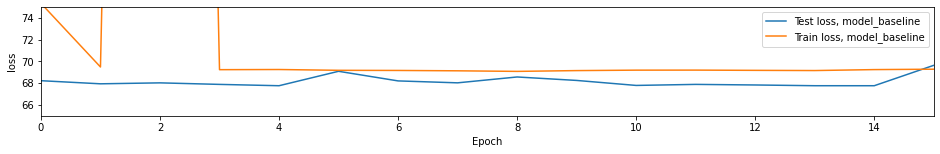

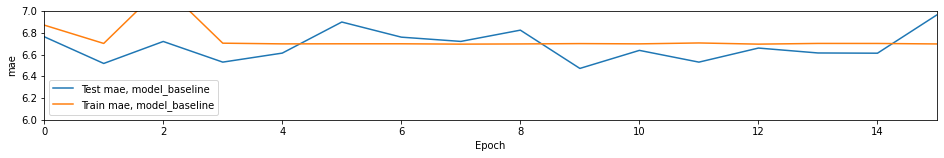

In [ ]:
plot_histories(histories = [history_baseline],
               names = ['model_baseline'],
               measure = 'loss',
               xlim_max = 15,
               ylim_min = 65,
               ylim_max = 75)

plot_histories(histories = [history_baseline],
               names = ['model_baseline'],
               measure = 'mae',
               xlim_max = 15,
               ylim_min = 6,
               ylim_max = 7)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model_early = build_model(20, 'relu', None, False, False)

history_early = model_early.fit(X_train,
                                y_train,
                                validation_data = (X_val, y_val),
                                epochs = 20,
                                callbacks = [early_stopping])

Epoch 1/20
500/500 [==============================] - 9s 16ms/step - loss: 20369.0293 - mae: 13.0972 - val_loss: 67.7846 - val_mae: 6.5698
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 69.7401 - mae: 6.7071 - val_loss: 67.7757 - val_mae: 6.6233
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 69.7319 - mae: 6.7024 - val_loss: 69.0571 - val_mae: 6.8946
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 69.4788 - mae: 6.7072 - val_loss: 67.9035 - val_mae: 6.5268
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 69.5410 - mae: 6.7031 - val_loss: 67.7648 - val_mae: 6.6101
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 69.4166 - mae: 6.7050 - val_loss: 70.3592 - val_mae: 7.0419
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 69.2982 - mae: 6.6994 - val_loss: 68.1678 - val_mae: 6.7517
Epoch 8/20
500/500 [==============================]

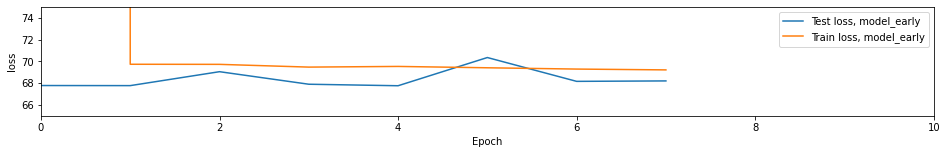

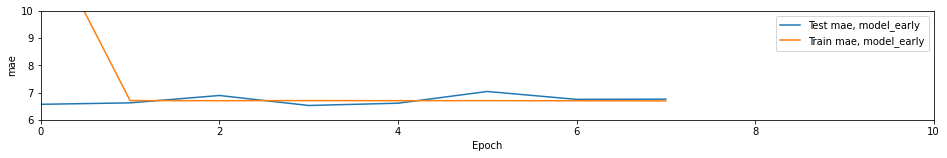

In [ ]:
plot_histories(histories = [history_early],
               names = ['model_early'],
               measure = 'loss',
               xlim_max = 10,
               ylim_min = 65,
               ylim_max = 75)

plot_histories(histories = [history_early],
               names = ['model_early'],
               measure = 'mae',
               xlim_max = 10,
               ylim_min = 6,
               ylim_max = 10)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model_regularized = build_model(20, 'relu', tf.keras.regularizers.l2(0.001), False, False)

history_regularized = model_regularized.fit(X_train,
                                            y_train,
                                            validation_data = (X_val, y_val),
                                            epochs = 20,
                                            callbacks = [early_stopping])

Epoch 1/20
500/500 [==============================] - 13s 23ms/step - loss: 451.6997 - mae: 7.6603 - val_loss: 77.1416 - val_mae: 6.5836
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 78.8926 - mae: 6.7057 - val_loss: 76.9334 - val_mae: 6.6205
Epoch 3/20
500/500 [==============================] - 11s 22ms/step - loss: 78.7403 - mae: 6.7014 - val_loss: 77.6247 - val_mae: 6.8362
Epoch 4/20
500/500 [==============================] - 11s 22ms/step - loss: 78.2863 - mae: 6.7069 - val_loss: 76.6848 - val_mae: 6.5304
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 78.1733 - mae: 6.7017 - val_loss: 76.3893 - val_mae: 6.6218
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 77.9108 - mae: 6.7060 - val_loss: 79.0197 - val_mae: 7.0639
Epoch 7/20
500/500 [==============================] - 11s 23ms/step - loss: 77.6491 - mae: 6.7000 - val_loss: 76.4123 - val_mae: 6.7501
Epoch 8/20
500/500 [===========================

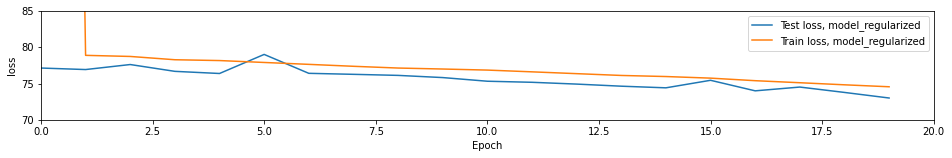

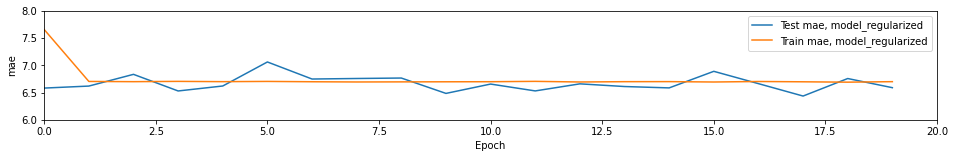

In [ ]:
plot_histories(histories = [history_regularized],
               names = ['model_regularized'],
               measure = 'loss',
               xlim_max = 20,
               ylim_min = 70,
               ylim_max = 85)

plot_histories(histories = [history_regularized],
               names = ['model_regularized'],
               measure = 'mae',
               xlim_max = 20,
               ylim_min = 6,
               ylim_max = 8)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model_dropout = build_model(20, 'relu', tf.keras.regularizers.l2(0.0001), True, False)

history_dropout = model_dropout.fit(X_train,
                                    y_train,
                                    validation_data = (X_val, y_val),
                                    epochs = 20,
                                    callbacks = [early_stopping])

Epoch 1/20
500/500 [==============================] - 13s 23ms/step - loss: 53131.8438 - mae: 16.7412 - val_loss: 69.4154 - val_mae: 6.6369
Epoch 2/20
500/500 [==============================] - 11s 23ms/step - loss: 71.3517 - mae: 6.7011 - val_loss: 69.3356 - val_mae: 6.6024
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 71.3225 - mae: 6.7010 - val_loss: 69.6223 - val_mae: 6.7302
Epoch 4/20
500/500 [==============================] - 11s 23ms/step - loss: 71.0373 - mae: 6.7074 - val_loss: 69.4646 - val_mae: 6.5219
Epoch 5/20
500/500 [==============================] - 11s 23ms/step - loss: 71.2404 - mae: 6.7073 - val_loss: 69.2941 - val_mae: 6.6002
Epoch 6/20
500/500 [==============================] - 11s 23ms/step - loss: 70.9643 - mae: 6.7057 - val_loss: 71.6702 - val_mae: 7.0200
Epoch 7/20
500/500 [==============================] - 11s 23ms/step - loss: 70.9033 - mae: 6.7022 - val_loss: 69.7077 - val_mae: 6.7557
Epoch 8/20
500/500 [========================

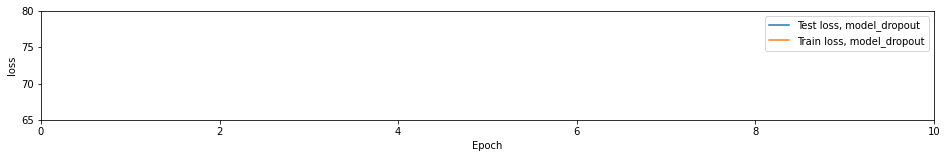

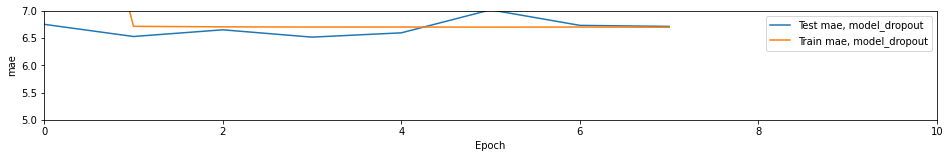

In [ ]:
plot_histories(histories = [history_dropout],
               names = ['model_dropout'],
               measure = 'loss',
               xlim_max = 10,
               ylim_min = 65,
               ylim_max = 80)

plot_histories(histories = [history_dropout],
               names = ['model_dropout'],
               measure = 'mae',
               xlim_max = 10,
               ylim_min = 5,
               ylim_max = 7)

The below code makes predictions and then saves them (after checking they are in correct format).

It converts to appropriate $\texttt{.csv}$ for Kaggle submit.

In [ ]:
y_test_hat = model_dropout.predict(X_test)
y_test_hat_pd = pd.DataFrame({
    'Id': list(range(5000)),
    'Predicted': y_test_hat.reshape(-1)})

157/157 [==============================] - 1s 3ms/step


In [ ]:
# After you make your predictions, you should submit them on the Kaggle webpage for our competition.

# Below is a small check that your output has the right type and shape
assert isinstance(y_test_hat_pd, pd.DataFrame)
assert all(y_test_hat_pd.columns == ['Id', 'Predicted'])
assert len(y_test_hat_pd) == 5000

# If you pass the checks, the file is saved.
y_test_hat_pd.to_csv('/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Assignments/Assignment 3./y_test_hat.csv', index = False)